<a href="https://colab.research.google.com/github/norflin321/ml/blob/main/txt2img_diffusers_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (147 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', megapixel, prophoto rgb, halfrear lighting, natural lighting, incandescent, moody lighting, cinematic lighting, studio lighting, soft lighting, no watermark, contre - jour, edge lighting, accent lighting, insanely detailed and intricate, hypermaximalist, elegant, hyper realistic, super detailed, dynamic pose, photography, 8']


  0%|          | 0/50 [00:00<?, ?it/s]

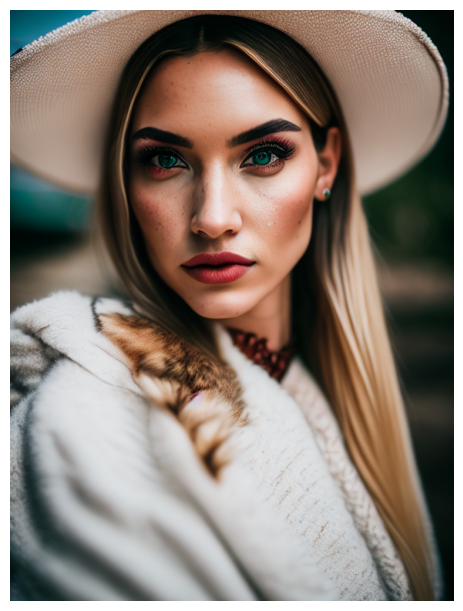

In [39]:
!pip install transformers diffusers accelerate

import torch
from diffusers import StableDiffusionPipeline
from matplotlib import pyplot as plt
import time

# diffusers docs: https://huggingface.co/docs/diffusers/api/pipelines/stable_diffusion/text2img#texttoimage-generation

model_id = "dreamlike-art/dreamlike-diffusion-1.0"
# model_id = "XpucT/Deliberate"

# hyperparameters
width, height = 576, 768 # The width and height in pixels of the generated image
steps = 50 # The number of denoising steps. More denoising steps usually lead to a higher quality image at the expense of slower inference.
guidance = 7.5 # Higher guidance scale encourages to generate images that are closely linked to the text prompt, usually at the expense of lower image quality.
images_to_generate = 1 # The number of images to generate per prompt
seed = None # set any number for reproducibility

# prompts
promp = "women, hyper-detailed, beautifully color-coded, insane details, intricate details, beautifully color graded, Unreal Engine 5, Cinematic, Color Grading, Editorial Photography, Photography, Photoshoot, Shot on 22mm lens, Depth of Field, Tilt Blur, Shutter Speed 1/1000, F/22, White Balance, 32k, Super-Resolution, Megapixel, ProPhoto RGB, Halfrear Lighting,Natural Lighting, Incandescent,Moody Lighting, Cinematic Lighting, Studio Lighting, Soft Lighting, no watermark, Contre-Jour, Edge Lighting, Accent Lighting, insanely detailed and intricate, hypermaximalist, elegant, hyper realistic, super detailed, dynamic pose, photography, 8"
negative_prompt = "easynegative, (low quality, worst quality:1.4), bad anatomy, bad composition, out of frame, duplicate, watermark, signature, text, deformed, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
pipe = pipe.to(device)

for i in range(images_to_generate):
    generator = torch.Generator().manual_seed(seed) if seed else None
    img = pipe(prompt=promp, negative_prompt=negative_prompt, width=width, height=height, num_inference_steps=steps, guidance_scale=guidance, generator=generator).images[0]
    img.save(f"./{int(time.time())}_{i}.jpg")
    plt.figure(figsize=(width/100, height/100))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# TODO: implement img2img pipeline for upscale and GFPGAN (https://huggingface.co/TencentARC/GFPGANv1)
